<a href="https://colab.research.google.com/github/nhtusci/Brain-Tumor-Classificaiton/blob/main/brain_tumor_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


{}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset


Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
100% 149M/149M [00:06<00:00, 24.9MB/s]
100% 149M/149M [00:06<00:00, 22.5MB/s]


In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
#---------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#---------------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")



In [ ]:
import os

# Đường dẫn gốc nơi bạn muốn tạo cấu trúc thư mục
base_path = '/content/Training'

# Danh sách các lớp
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Tạo các thư mục cho từng lớp
for class_name in classes:
    class_path = os.path.join(base_path, class_name)
    # Tạo thư mục nếu nó không tồn tại
    if not os.path.exists(class_path):
        os.makedirs(class_path)
        print(f'Tạo thư mục: {class_path}')
    else:
        print(f'Thu mục đã tồn tại: {class_path}')


Thu mục đã tồn tại: /content/Training/glioma
Thu mục đã tồn tại: /content/Training/meningioma
Thu mục đã tồn tại: /content/Training/notumor
Thu mục đã tồn tại: /content/Training/pituitary


In [ ]:
import os

# Đường dẫn gốc nơi bạn muốn tạo cấu trúc thư mục
base_path = '/content/Testing'

# Danh sách các lớp
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Tạo các thư mục cho từng lớp
for class_name in classes:
    class_path = os.path.join(base_path, class_name)
    # Tạo thư mục nếu nó không tồn tại
    if not os.path.exists(class_path):
        os.makedirs(class_path)
        print(f'Tạo thư mục: {class_path}')
    else:
        print(f'Thu mục đã tồn tại: {class_path}')


Thu mục đã tồn tại: /content/Testing/glioma
Thu mục đã tồn tại: /content/Testing/meningioma
Thu mục đã tồn tại: /content/Testing/notumor
Thu mục đã tồn tại: /content/Testing/pituitary


In [ ]:
#---------------------------------------
# Hàm tạo dataframe cho tập train
def train_df(tr_path):
    classes = []
    class_paths = []
    for label in os.listdir(tr_path):
        label_dir = os.path.join(tr_path, label)
        if os.path.isdir(label_dir):
            for image in os.listdir(label_dir):
                img_path = os.path.join(label_dir, image)
                classes.append(label)
                class_paths.append(img_path)
    tr_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return tr_df

# Hàm tạo dataframe cho tập test
def test_df(ts_path):
    classes = []
    class_paths = []
    for label in os.listdir(ts_path):
        label_dir = os.path.join(ts_path, label)
        if os.path.isdir(label_dir):
            for image in os.listdir(label_dir):
                img_path = os.path.join(label_dir, image)
                classes.append(label)
                class_paths.append(img_path)
    ts_df = pd.DataFrame({'Class Path': class_paths, 'Class': classes})
    return ts_df


In [ ]:
!pwd


/content


In [ ]:
# Đọc tập train và test
tr_df = train_df('/content/Training')
print('Train Dataset:', tr_df)

ts_df = test_df('/content/Testing')
print('Test Dataset:', ts_df)


Train Dataset:                                        Class Path       Class
0     /content/Training/meningioma/Tr-me_0383.jpg  meningioma
1     /content/Training/meningioma/Tr-me_0289.jpg  meningioma
2     /content/Training/meningioma/Tr-me_0148.jpg  meningioma
3     /content/Training/meningioma/Tr-me_1332.jpg  meningioma
4     /content/Training/meningioma/Tr-me_0058.jpg  meningioma
...                                           ...         ...
5707     /content/Training/notumor/Tr-no_0531.jpg     notumor
5708     /content/Training/notumor/Tr-no_0538.jpg     notumor
5709     /content/Training/notumor/Tr-no_0445.jpg     notumor
5710     /content/Training/notumor/Tr-no_1304.jpg     notumor
5711     /content/Training/notumor/Tr-no_0059.jpg     notumor

[5712 rows x 2 columns]
Test Dataset:                                       Class Path       Class
0     /content/Testing/meningioma/Te-me_0138.jpg  meningioma
1     /content/Testing/meningioma/Te-me_0099.jpg  meningioma
2     /content/Test

In [ ]:
#---------------------------------------
# Chia tập train thành train và validation (70% train, 30% validation)
tr_df, valid_df = train_test_split(tr_df, train_size=0.7, random_state=20, stratify=tr_df['Class'])

print('Trained Dataset:', tr_df)
print('Valid Dataset:', valid_df)

Trained Dataset:                                        Class Path       Class
3627   /content/Training/pituitary/Tr-pi_0755.jpg   pituitary
2554      /content/Training/glioma/Tr-gl_1241.jpg      glioma
5119     /content/Training/notumor/Tr-no_1593.jpg     notumor
50    /content/Training/meningioma/Tr-me_0574.jpg  meningioma
91    /content/Training/meningioma/Tr-me_0212.jpg  meningioma
...                                           ...         ...
5234     /content/Training/notumor/Tr-no_1293.jpg     notumor
4363     /content/Training/notumor/Tr-no_0371.jpg     notumor
4253     /content/Training/notumor/Tr-no_1206.jpg     notumor
4915     /content/Training/notumor/Tr-no_1075.jpg     notumor
2593      /content/Training/glioma/Tr-gl_1303.jpg      glioma

[3998 rows x 2 columns]
Valid Dataset:                                        Class Path       Class
42    /content/Training/meningioma/Tr-me_1131.jpg  meningioma
3063   /content/Training/pituitary/Tr-pi_0117.jpg   pituitary
2333      /co

In [ ]:
# Data preprocessing
batch_size = 64
img_size = (299, 299)
_gen = ImageDataGenerator(rescale=1/255, brightness_range=(0.8, 1.2))

tr_gen = _gen.flow_from_dataframe(tr_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size)
valid_gen = _gen.flow_from_dataframe(valid_df, x_col='Class Path', y_col='Class', batch_size=batch_size, target_size=img_size)
ts_gen = ImageDataGenerator(rescale=1/255).flow_from_dataframe(ts_df, x_col='Class Path', y_col='Class', batch_size=16, target_size=img_size, shuffle=False)


Found 3998 validated image filenames belonging to 4 classes.
Found 1714 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.


In [ ]:
import random

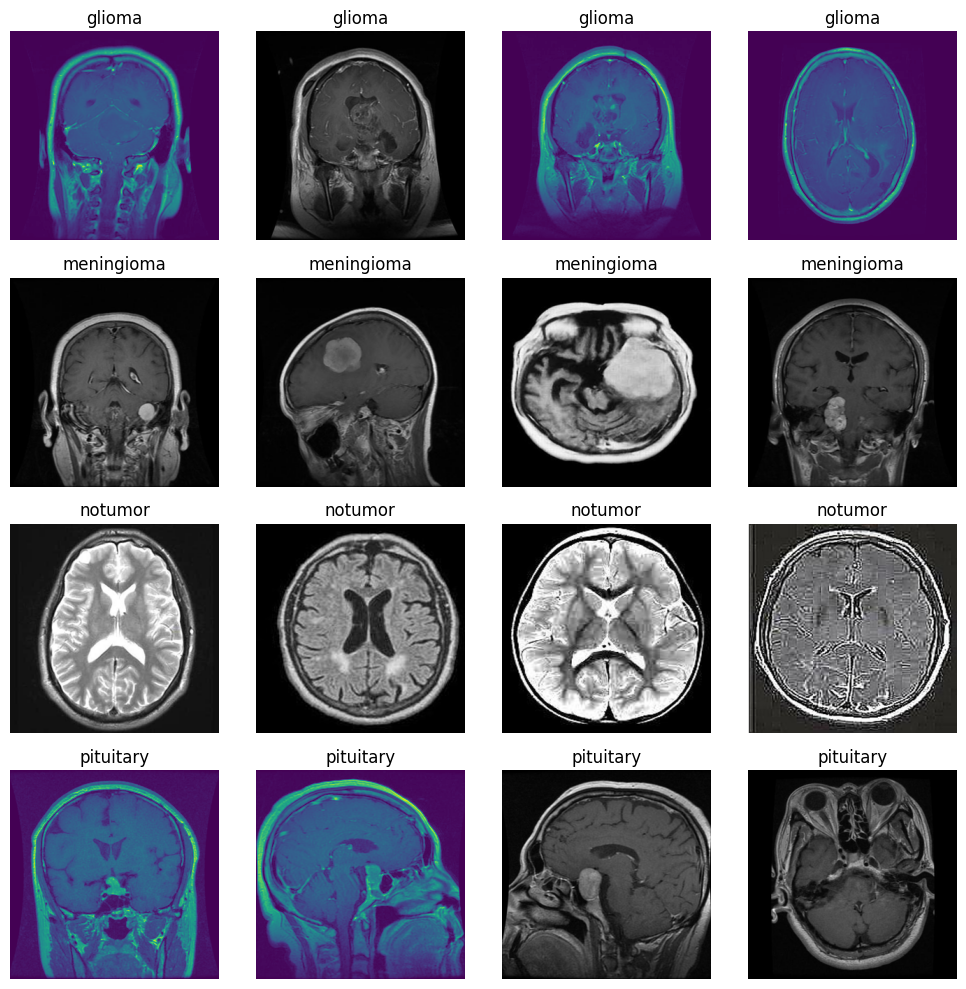

In [ ]:
# Hiển thị hình ảnh ngẫu nhiên từ mỗi lớp
class_dict = tr_gen.class_indices
classes = list(class_dict.keys())
num_images_per_class = 4  # Số lượng hình ảnh muốn hiển thị từ mỗi lớp

plt.figure(figsize=(10, 10))

for i, class_name in enumerate(classes):
    class_images = tr_df[tr_df['Class'] == class_name]['Class Path'].values
    random_images = random.sample(list(class_images), min(num_images_per_class, len(class_images)))  # Chọn ngẫu nhiên hình ảnh
    for j, img_path in enumerate(random_images):
        img = Image.open(img_path).resize((img_size[0], img_size[1]))
        plt.subplot(len(classes), num_images_per_class, i * num_images_per_class + j + 1)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from keras import layers
from keras.applications import EfficientNetB0

In [ ]:
# IMG_SIZE is determined by EfficientNet model choice
IMG_SIZE = 224
BATCH_SIZE = 64

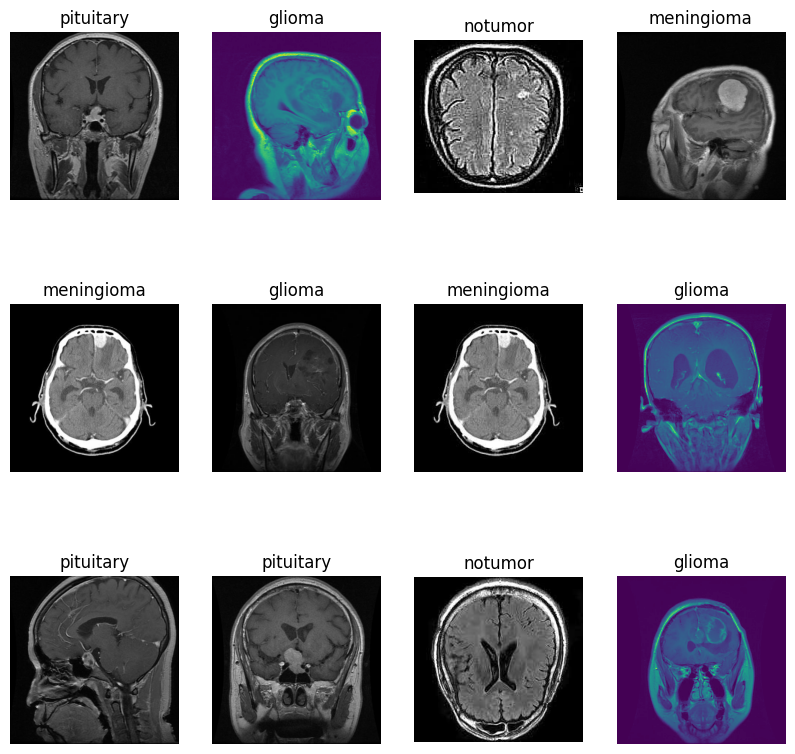

In [ ]:
def format_label(label):
    # Giả sử bạn có một hàm chuyển đổi nhãn từ số nguyên sang chuỗi
    return label  # Thay đổi nếu bạn cần một hàm chuyển đổi khác

# Lấy nhãn từ cột 'Class' của DataFrame
labels = tr_df['Class'].values

plt.figure(figsize=(10, 10))
for i, (image_path, label) in enumerate(zip(tr_df['Class Path'].values, labels)):
    if i >= 12:  # Giới hạn số lượng hình ảnh hiển thị
        break
    img = Image.open(image_path)  # Mở hình ảnh từ đường dẫn
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title("{}".format(format_label(label)))
    plt.axis("off")

plt.show()



In [ ]:
img_augmentation_layers = [
    layers.RandomRotation(factor=0.15),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomFlip(),
    layers.RandomContrast(factor=0.1),
]


def img_augmentation(images):
    for layer in img_augmentation_layers:
        images = layer(images)
    return images

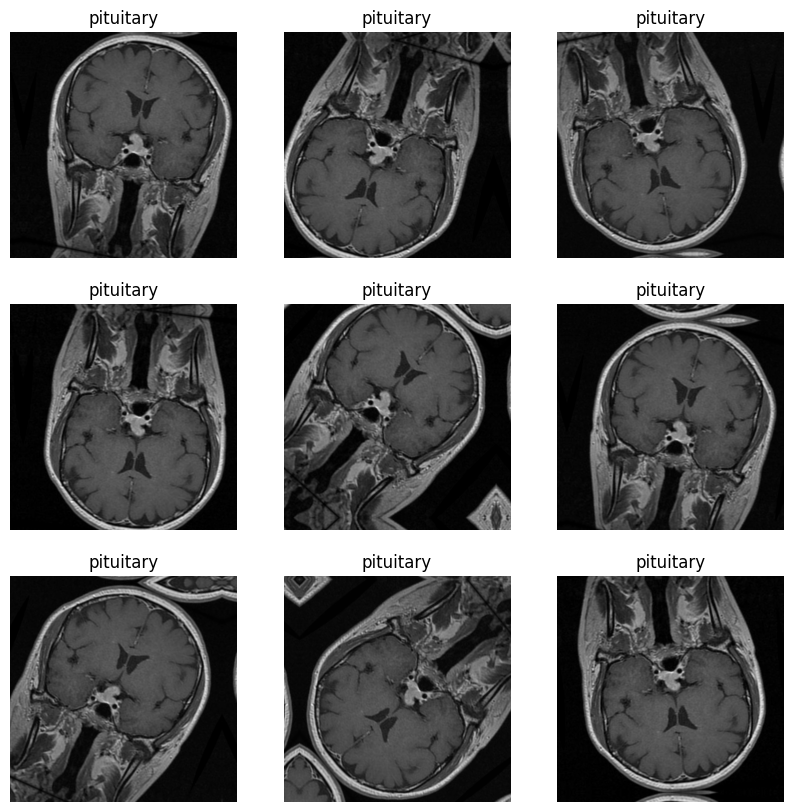

In [ ]:

# Lặp qua một hình ảnh và nhãn từ DataFrame
for index in range(1):  # Lặp 1 lần để lấy một hình ảnh
    image = tr_df['Class Path'].values[index]  # Đường dẫn hình ảnh từ DataFrame
    label = tr_df['Class'].values[index]  # Nhãn từ DataFrame

    plt.figure(figsize=(10, 10))  # Kích thước hình ảnh
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        # Mở hình ảnh và áp dụng tăng cường dữ liệu
        img = Image.open(image)  # Mở hình ảnh từ đường dẫn
        aug_img = img_augmentation(np.expand_dims(np.array(img), axis=0))  # Tăng cường dữ liệu
        aug_img = np.array(aug_img)

        plt.imshow(aug_img[0].astype("uint8"))

        # Sử dụng nhãn văn bản trực tiếp
        formatted_label = format_label(label)  # Gọi hàm format_label
        plt.title("{}".format(formatted_label))
        plt.axis("off")

    plt.show()  # Hiển thị hình ảnh đã vẽ

In [ ]:
# Lấy số lượng lớp từ cột nhãn
NUM_CLASSES = tr_df['Class'].nunique()
print(f"Number of classes: {NUM_CLASSES}")


Number of classes: 4


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
import tensorflow as tf

# Ví dụ mô hình sửa đổi
model = Sequential([
    tf.keras.layers.Input(shape=(299, 299, 3)),  # Xác định kích thước đầu vào
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Sử dụng lớp này hoặc Flatten()
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')  # Lớp đầu ra với 10 lớp (thay đổi theo bài toán của bạn)
])



In [ ]:
# Compile model
model.compile(optimizer=Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# Xem tóm tắt mô hình
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 297, 297, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 297, 297, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 297, 297, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 295, 295, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 295, 295, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 295, 295, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,612 (111.77 KB)

 Trainable params: 28,420 (111.02 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# Training
hist = model.fit(tr_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 shuffle=False)
hist.history.keys()

train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 561ms/step - accuracy: 0.2860 - loss: 1.3354 - precision_6: 0.9124 - recall_6: 0.0145 - val_accuracy: 0.2800 - val_loss: 1.3188 - val_precision_6: 1.0000 - val_recall_6: 0.0070
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 547ms/step - accuracy: 0.2942 - loss: 1.3034 - precision_6: 0.9216 - recall_6: 0.0334 - val_accuracy: 0.3769 - val_loss: 1.2556 - val_precision_6: 0.8696 - val_recall_6: 0.0933
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 512ms/step - accuracy: 0.4281 - loss: 1.2370 - precision_6: 0.8736 - recall_6: 0.0813 - val_accuracy: 0.5058 - val_loss: 1.1514 - val_precision_6: 0.8750 - val_recall_6: 0.1184
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 32s 510ms/step - accuracy: 0.5444 - loss: 1.1315 - precision_6: 0.8289 - recall_6: 0.1305 - val_accuracy: 0.5735 - val_loss: 1.0835 - val_precision_6: 0.8325 - val_recall_6: 0.2060
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 539ms/step - accuracy: 0.5778 - loss: 1.0637 - precision_6: 0.7834 - recall_6: 0.2

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

model = Sequential([
    tf.keras.layers.Input(shape=(299, 299, 3)),  # Xác định kích thước đầu vào
    Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),  # L2 Regularization
    BatchNormalization(),  # Giúp cải thiện độ chính xác
    Dropout(0.3),  # Tăng khả năng kháng với overfitting
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.01)),  # L2 Regularization
    BatchNormalization(),  # Giúp cải thiện độ chính xác
    Dropout(0.3),  # Tăng khả năng kháng với overfitting
    GlobalAveragePooling2D(),  # Sử dụng lớp này hoặc Flatten()
    Dropout(0.5),  # Dropout thêm trước khi lớp Dense
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),  # L2 Regularization
    Dropout(0.5),  # Dropout thêm trước khi lớp đầu ra
    Dense(4, activation='softmax')  # Lớp đầu ra với số lớp tương ứng
])


In [ ]:
# Biên dịch mô hình
model.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Hiển thị cấu trúc mô hình
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)                   │ (None, 297, 297, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 297, 297, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 297, 297, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 295, 295, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 295, 295, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 295, 295, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_6           │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,612 (111.77 KB)

 Trainable params: 28,420 (111.02 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
# Training
hist = model.fit(tr_gen,
                 epochs=10,
                 validation_data=valid_gen,
                 shuffle=False)
hist.history.keys()

train_score = model.evaluate(tr_gen, verbose=1)
valid_score = model.evaluate(valid_gen, verbose=1)
test_score = model.evaluate(ts_gen, verbose=1)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 677ms/step - accuracy: 0.3930 - loss: 2.4961 - precision_11: 0.5510 - recall_11: 0.0849 - val_accuracy: 0.2550 - val_loss: 2.3906 - val_precision_11: 0.0000e+00 - val_recall_11: 0.0000e+00
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 595ms/step - accuracy: 0.5872 - loss: 1.9475 - precision_11: 0.7510 - recall_11: 0.2819 - val_accuracy: 0.2550 - val_loss: 2.4323 - val_precision_11: 0.2550 - val_recall_11: 0.2550
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 568ms/step - accuracy: 0.6118 - loss: 1.7204 - precision_11: 0.7765 - recall_11: 0.3802 - val_accuracy: 0.2550 - val_loss: 2.5801 - val_precision_11: 0.2550 - val_recall_11: 0.2550
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 554ms/step - accuracy: 0.6345 - loss: 1.5526 - precision_11: 0.7678 - recall_11: 0.4006 - val_accuracy: 0.2550 - val_loss: 2.6835 - val_precision_11: 0.2550 - val_recall_11: 0.2550
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 554ms/step - accuracy: 0.6515 - loss: 1.4197 - precision_1

In [ ]:
# Giả định rằng bạn có một DataFrame 'tr_df' với cột 'Class' chứa nhãn
unique_classes = tr_df['Class'].unique()
class_to_index = {label: index for index, label in enumerate(unique_classes)}

# Hàm để chuyển đổi nhãn văn bản thành số
def label_to_index(label):
    return class_to_index[label]


In [ ]:
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from PIL import Image
import numpy as np

def preprocess_image(image_path, label):
    img = Image.open(image_path).convert('RGB')  # Đảm bảo hình ảnh là RGB
    img = np.array(img)  # Chuyển đổi thành numpy array
    img = img_augmentation(img)  # Áp dụng tăng cường dữ liệu
    img = tf.image.resize(img, [224, 224])  # Thay đổi kích thước
    img = img / 255.0  # Chuẩn hóa

    int_label = label_to_index(label)  # Chuyển đổi nhãn văn bản thành chỉ số
    label = to_categorical(int_label, num_classes=NUM_CLASSES)  # Chuyển đổi thành one-hot encoding

    return img, label


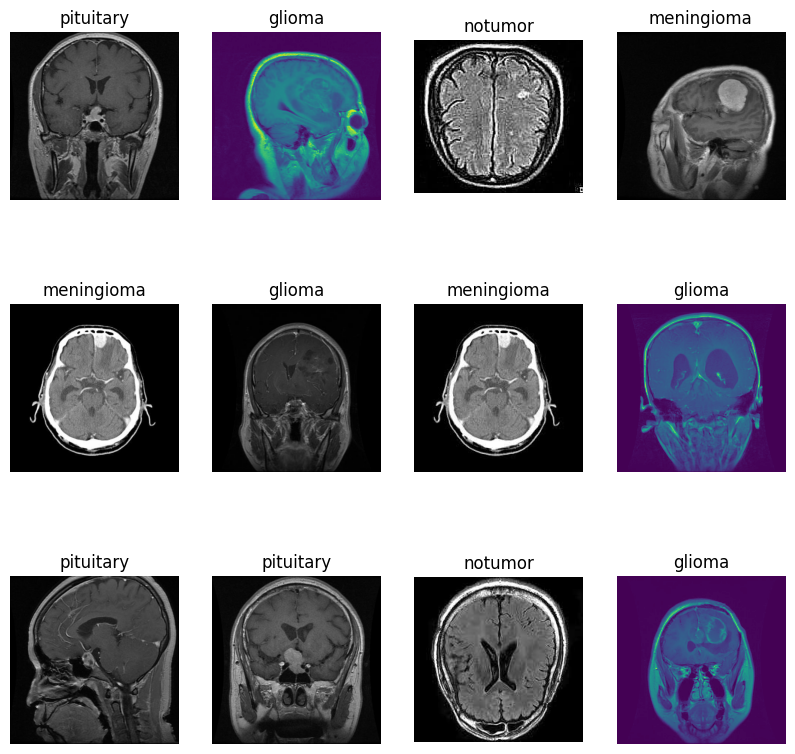

In [ ]:
def format_label(label):
    # Giả sử bạn có một hàm chuyển đổi nhãn từ số nguyên sang chuỗi
    return label  # Thay đổi nếu bạn cần một hàm chuyển đổi khác

# Lấy nhãn từ cột 'Class' của DataFrame
labels = tr_df['Class'].values

plt.figure(figsize=(10, 10))
for i, (image_path, label) in enumerate(zip(tr_df['Class Path'].values, labels)):
    if i >= 12:  # Giới hạn số lượng hình ảnh hiển thị
        break
    img = Image.open(image_path)  # Mở hình ảnh từ đường dẫn
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(img)
    plt.title("{}".format(format_label(label)))
    plt.axis("off")

plt.show()



In [ ]:
from tensorflow.keras.utils import to_categorical
def preprocess_image(image_path, label):
    img = Image.open(image_path).convert('RGB')  # Đảm bảo hình ảnh là RGB
    img = np.array(img)  # Chuyển đổi thành numpy array
    img = img_augmentation(img)  # Áp dụng tăng cường dữ liệu
    img = tf.image.resize(img, [224, 224])  # Thay đổi kích thước
    img = img / 255.0  # Chuẩn hóa
    label = to_categorical(label, num_classes=NUM_CLASSES)  # Chuyển đổi thành one-hot encoding
    return img, label

# Giả định tr_df chứa đường dẫn hình ảnh và nhãn
ds_train = []
for idx in range(len(tr_df)):
    img, label = preprocess_image(tr_df['Class Path'].iloc[idx], tr_df['Class'].iloc[idx])
    ds_train.append((img, label))

# Chuyển đổi danh sách thành tensor
ds_train = tf.data.Dataset.from_tensor_slices(ds_train)
ds_train = ds_train.batch(batch_size=BATCH_SIZE)



ValueError: invalid literal for int() with base 10: 'pituitary'

In [ ]:
model = EfficientNetB0(
    include_top=True,
    weights=None,
    classes=NUM_CLASSES,
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

epochs = 40  # @param {type: "slider", min:10, max:100}
hist = model.fit(tr_df, epochs=epochs, validation_data=ts_df)

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_14            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_9 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_14[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 224, 224, 3)    │              7 │ rescaling_9[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ normalization[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand         │ (None, 1, 1, 32)       │            288 │ block1a_se_reduce[0][… │
│ (Conv2D)             

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 4,012,672 (15.31 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/40


ValueError: Input 0 of layer "efficientnetb0" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 2)